### DSC 510 Topic 4 DQ1
Data visualization is an important tool for communicating complex information to diverse audiences. Discuss the potential ethical considerations when designing and presenting data visualizations. How can data visualizations be used to manipulate or mislead viewers, and what strategies can be used to address these concerns? Provide at least two examples of data visualizations that illustrate ethical considerations in data presentation. How can Python be used to implement these strategies and create effective, ethical data visualizations?

### Discussion
Ethical concerns to be vigilant of when creating visualizations include misinterpretation of data and disclosures when presenting. Effective visualizations engage the audience in a way that allows them to easily interpret analysis. If the visualization created leave the viewer unsure of the take away, the visual is not effective. Further, any manipulation of the data, presenter bias, and characteristics of the data should be disclosed. 

It is the responsibility of the presenter to ensure that data is accurately interpreted and bias are pointed out. There are several datasets that have the same summary statistics, but plotted have very different representations. The presenter must be cognizant of this and other underlying impacts on the dataset being analyzed.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data from csv
data = pd.read_csv('ds_salaries.csv')

In [3]:
#read to data frame and explore data
df = pd.DataFrame(data)
df.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
df.describe()

,id,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


Text(0.5, 1.0, 'Data Science Salries in USD by Employment Type and Experience Level')

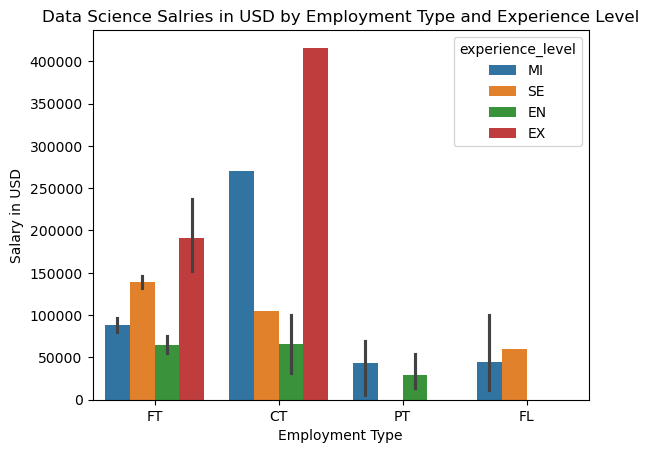

In [6]:
ax = sns.barplot(x='employment_type',y='salary_in_usd',data=df, hue='experience_level')
ax.set_xlabel('Employment Type')
ax.set_ylabel('Salary in USD')
ax.set_title('Data Science Salaries in USD by Employment Type and Experience Level')


From the plot above we may be able to infer that contractors make the most, especially mid level and experts. Looking at this graph we can see there is no data for senior or expert level for part time data scientists. There are only senior and mid level data points for those who reported themselves as floats. 

Going based off of the above bar graph above, a news site may feel comfortable stating that contractor data scientist make twice as much as full time employees. However, going deeper into the data will give us more insight to be able to determine if this is an accurate statement. 

In [7]:
#find the data points equal to contractor employement type
contractors = df.loc[df['employment_type']=='CT']
contractors

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
28,28,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
78,78,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
225,225,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
283,283,2021,SE,CT,Staff Data Scientist,105000,USD,105000,US,100,US,M
489,489,2022,EN,CT,Applied Machine Learning Scientist,29000,EUR,31875,TN,100,CZ,M


In [8]:
#count the data points for each employment type
df['employment_type'].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

From the above data exploration, it would not be ethical to make a claim on average salaries for fulltime employees versus other employment types due to the lack of data of non full time employers. 

In [9]:
#drop employement types not equal to full time
df = df.loc[df['employment_type']=='FT']

In [10]:
#Rename levels
levels = {'EN':'1 Entry Level','MI':'2 Mid Level','SE':'3 Senior Level','EX':'4 Expert Level'}
df['experience_level'] = df['experience_level'].map(levels)

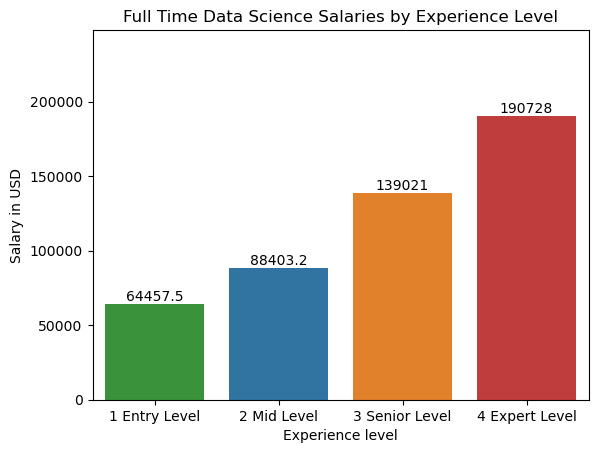

In [30]:
#create plot of full time mean data science salaried by experience level
ax2 = sns.barplot(x='experience_level',y='salary_in_usd',data=df,hue='experience_level',
                  order=df['experience_level'].sort_values(),err_kws={'linewidth': 0})
ax2.set_xlabel('Experience level')
ax2.set_ylabel('Salary in USD')
ax2.set_title('Full Time Data Science Salaries by Experience Level')
for i in ax2.containers:
    ax2.bar_label(i,)

This is a more transparent and easy to interpret plot compared to the first chart. Even with data removed, it is better to focus on a single employment type that we have a robust dataset for. Further, the sorting of the chart and elongated experience level names removes ambiguity to the viewer. This visual also shows more transparency by including data labels. 

From this chart we can see that expert level data scientists make nearly 3 times more than entry level data scientists. 

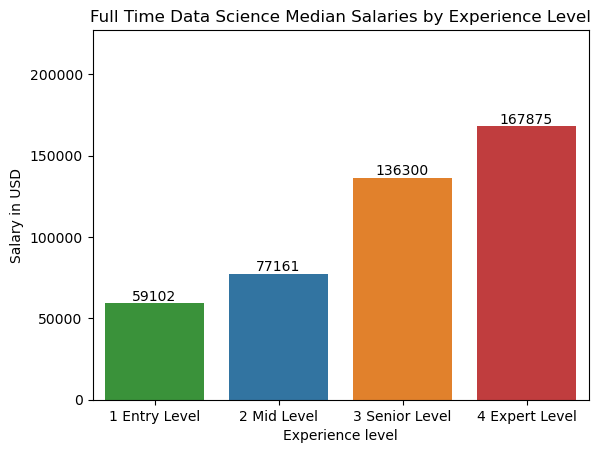

In [33]:
# plot median salaries by experienc level
ax3 = sns.barplot(x='experience_level',y='salary_in_usd',data=df,hue='experience_level',
                  order=df['experience_level'].sort_values(),err_kws={'linewidth': 0}, estimator='median')
ax3.set_xlabel('Experience level')
ax3.set_ylabel('Salary in USD')
ax3.set_title('Full Time Data Science Median Salaries by Experience Level')
for i in ax3.containers:
    ax3.bar_label(i,)

As we have discussed at extent in this class, other ways visualizations can be bias are through the measures of central tendencies used. In the prior bar chart, we used the mean. This chart shows the median salaries and we can see there is an over 20,000 difference in expert level pay and an over 10,000 difference in mid level pay. 

This shows how high the outliers are in these two categories.

When visualizing data, it is the ethical duty of the analyst to draw insight of the data and ensure manipulations do not impute bias. The burden of creating an easy to read and appropriate visual is on the analyst. Neglecting to transform data into obvious and true visuals is a shortcoming. To transform data in a way that misleads readers and allows for loose extrapolations is an ethical failure. 

References

Faisal, Z. (2024, February 27). Data science salaries. Kaggle. https://www.kaggle.com/datasets/zain280/data-science-salaries 

Misleading graphs: Real life examples. Statistics How To. (2024, January 5). https://www.statisticshowto.com/probability-and-statistics/descriptive-statistics/misleading-graphs/ 

Rogel-Salazar, J. (2023). Statistics and data visualisation with python. CRC Press.

Webber, K. L., & Morn, J. (2019). Limitations in data analytics: Considerations related to ethics, security, and possible misrepresentation in data reports and visualizations. IHE Research Projects Series, 3.